1. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [ ]:
import numpy as np
import pandas as pd

# Sample dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = {}

    def add_child(self, value, node):
        self.children[value] = node

# Calculate entropy
def entropy(s):
    _, counts = np.unique(s, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = - probabilities.dot(np.log2(probabilities))
    return entropy

# Calculate information gain
def information_gain(data, attribute_name, target_name):
    total_entropy = entropy(data[target_name])

    values, counts = np.unique(data[attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[attribute_name] == values[i]).dropna()[target_name]) for i in range(len(values))])

    information_gain = total_entropy - weighted_entropy
    return information_gain

# ID3 algorithm
def id3(data, original_data, features, target_attribute_name="PlayTennis"):
    if len(np.unique(data[target_attribute_name])) == 1:
        return np.unique(data[target_attribute_name])[0]

    elif len(features) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])]

    best_feature = max(features, key=lambda x: information_gain(data, x, target_attribute_name))
    features.remove(best_feature)

    unique_values, counts = np.unique(data[best_feature], return_counts=True)

    node = Node(best_feature)

    for value in unique_values:
        sub_data = data.where(data[best_feature] == value).dropna()
        subtree = id3(sub_data, data, features, target_attribute_name)
        node.add_child(value, subtree)

    return node

# Prediction function
def predict(query, tree):
    for key in list(query.keys()):
        if key in list(tree.children.keys()):
            try:
                result = tree.children[key][query[key]]
            except:
                return "No"
            if isinstance(result, Node):
                return predict(query, result)
            else:
                return result

# Print the decision tree
def print_tree(node, depth=0):
    if isinstance(node, Node):
        print("\t"*depth + node.attribute + "?")
        for key, value in node.children.items():
            print("\t"*(depth+1) + key + ":")
            print_tree(value, depth+2)
    else:
        print("\t"*depth + node)

# Train the decision tree
features = list(df.columns[:-1])
tree = id3(df, df, features)

# Print the decision tree
print("Decision Tree:")
print_tree(tree)

# Predict a sample
sample = {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Strong'}
prediction = predict(sample, tree)
print("\nPrediction for sample:", prediction)


Decision Tree:
Outlook?
	Overcast:
		Yes
	Rain:
		Wind?
			Strong:
				No
			Weak:
				Yes
	Sunny:
		Temperature?
			Cool:
				Yes
			Hot:
				No
			Mild:
				No

Prediction for sample: None


2. Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 0, Loss: 3.0514652170836745
Epoch 1000, Loss: 1.2193318156261332
Epoch 2000, Loss: 1.0080008733557362
Epoch 3000, Loss: 0.867806671705521
Epoch 4000, Loss: 0.7405475750281757
Epoch 5000, Loss: 0.6263753727477992
Epoch 6000, Loss: 0.531733864805077
Epoch 7000, Loss: 0.45738874873717666
Epoch 8000, Loss: 0.4002467667676332
Epoch 9000, Loss: 0.35634001977877844


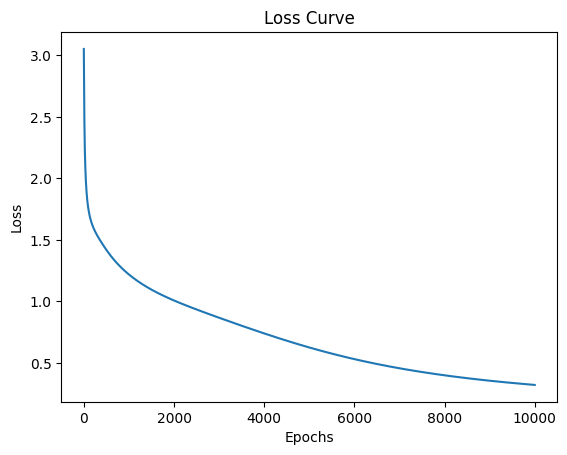

Accuracy: 100.00%


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize the neural network
def initialize_network(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    # Input to hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    # Hidden to output layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    return z1, a1, z2, a2

# Backpropagation
def backpropagation(X, y, z1, a1, z2, a2, W1, W2, b1, b2, learning_rate):
    m = X.shape[0]

    # Compute the gradients
    dz2 = a2 - y
    dW2 = (1 / m) * np.dot(a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = (1 / m) * np.dot(X.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    # Update the weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

# Predict function
def predict(X, W1, b1, W2, b2):
    _, _, _, a2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.argmax(a2, axis=1)

    return predictions

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Initialize the network
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
W1, b1, W2, b2 = initialize_network(input_size, hidden_size, output_size)

# Hyperparameters
epochs = 10000
learning_rate = 0.01

# Training the network
losses = []
for epoch in range(epochs):
    z1, a1, z2, a2 = forward_propagation(X_train, W1, b1, W2, b2)
    loss = (-1 / len(X_train)) * np.sum(y_train * np.log(a2) + (1 - y_train) * np.log(1 - a2))
    losses.append(loss)

    W1, b1, W2, b2 = backpropagation(X_train, y_train, z1, a1, z2, a2, W1, W2, b1, b2, learning_rate)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Predictions
predictions = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases for the hidden layer
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))

        # Initialize weights and biases for the output layer
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward pass through the network
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_hidden) + self.bias_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output):
        # Backward pass through the network
        error = y - output

        # Calculate gradients for output layer
        delta_output = error * self.sigmoid_derivative(output)
        gradient_output = np.dot(self.hidden_output.T, delta_output)
        self.weights_output += self.learning_rate * gradient_output
        self.bias_output += self.learning_rate * np.sum(delta_output, axis=0, keepdims=True)

        # Calculate gradients for hidden layer
        delta_hidden = np.dot(delta_output, self.weights_output.T) * self.sigmoid_derivative(self.hidden_output)
        gradient_hidden = np.dot(X.T, delta_hidden)
        self.weights_hidden += self.learning_rate * gradient_hidden
        self.bias_hidden += self.learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backpropagation
            self.backward(X, y, output)

            # Calculate and print the loss (MSE) for every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        return self.forward(X)

# Example usage:
# Define a dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
input_size = 2
hidden_size = 3
output_size = 1
epochs = 1000
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X, y, epochs)

# Make predictions
predictions = nn.predict(X)
print("Predictions:")
print(predictions)


Epoch 0, Loss: 0.3427
Epoch 100, Loss: 0.2402
Epoch 200, Loss: 0.2352
Epoch 300, Loss: 0.2296
Epoch 400, Loss: 0.2232
Epoch 500, Loss: 0.2162
Epoch 600, Loss: 0.2085
Epoch 700, Loss: 0.2006
Epoch 800, Loss: 0.1926
Epoch 900, Loss: 0.1848
Predictions:
[[0.26671563]
 [0.71693621]
 [0.46473285]
 [0.52094949]]


3. Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Print correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        print(f"Correct Prediction: Actual - {y_test[i]}, Predicted - {y_pred[i]}")
        correct_predictions += 1
    else:
        print(f"Wrong Prediction: Actual - {y_test[i]}, Predicted - {y_pred[i]}")
        wrong_predictions += 1

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy * 100, "%")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 2, Predicted - 2
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 2, Predicted - 2
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 2, Predicted - 2
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 2, Predicted - 2
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 1, Predicted - 1
Correct Prediction: Actual - 2, Predicted - 2
Correct Prediction: Actual - 0, Predicted - 0
Correct Prediction: Actual - 2, Pr

4.Implement Dimensionality reduction using Principle Component Analysis (PCA) method.
Data preparation: Download heart dataset from following link.
https://www.kaggle.com/zhaoyingzhu/heartcsv
Perform following operation on given dataset.
a) Find Shape of Data
b) Find Missing Values
c) Find data type of each column
d) Finding out Zero's
e) Find Mean age of patients
f) Now extract only Age, Sex, Chest Pain, Rest BP, Chol. Randomly divide dataset in training
(75%) and testing (25%). Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually positive. Total 50 people in my sample were actually COVID positive. I have total 500 samples.
Create confusion matrix based on above data and find
I. Accuracy
II. Precision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Load the dataset
data = pd.read_csv("Heart.csv")

# a) Find Shape of Data
print("Shape of Data:", data.shape)

# b) Find Missing Values
print("\nMissing Values:\n", data.isnull().sum())

# c) Find data type of each column
print("\nData Types:\n", data.dtypes)

# d) Finding out Zero's
print("\nNumber of Zeros in each column:\n", (data == 0).sum())

# e) Find Mean age of patients
print(f"\nMean age of patients: {data['Age'].mean():.2f}")

# f) Extracting required columns and splitting the dataset
selected_columns = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']
X = data[selected_columns]
y = data['AHD']  # Considering 'AHD' as the target variable

# Randomly divide dataset in training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[['Sex', 'ChestPain']])
X_test_encoded = encoder.transform(X_test[['Sex', 'ChestPain']])

# Standardize the numerical features and combine with encoded features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['Sex', 'ChestPain']).astype(float))
X_test_scaled = scaler.transform(X_test.drop(columns=['Sex', 'ChestPain']).astype(float))

X_train_final = np.hstack((X_train_scaled, X_train_encoded))
X_test_final = np.hstack((X_test_scaled, X_test_encoded))

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

# Print explained variance ratio
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)

# Confusion matrix data
confusion_df = pd.DataFrame(confusion_matrix([1]*50 + [0]*450, [1]*45 + [0]*55 + [1]*5 + [0]*395),
                           index=['Predicted Positive', 'Predicted Negative'],
                           columns=['Actual Positive', 'Actual Negative'])

print("\nConfusion Matrix:\n", confusion_df)

# Calculate Accuracy
accuracy = accuracy_score([1]*50 + [0]*450, [1]*45 + [0]*55 + [1]*5 + [0]*395)
print("\nAccuracy:", accuracy)

# Calculate Precision
precision = precision_score([1]*50 + [0]*450, [1]*45 + [0]*55 + [1]*5 + [0]*395)
print("Precision:", precision)


Shape of Data: (303, 15)

Missing Values:
 Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

Data Types:
 Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

Number of Zeros in each column:
 Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

Mean age of patients: 54.44


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


5. Download temperature data from below link. https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv
This data consists of temperatures of INDIA averaging the temperatures of all places month wise. Temperatures values are recorded in CELSIUS
a. Apply Linear Regression using suitable library function and predict the Month-wise temperature.
b. Assess the performance of regression models using MSE, MAE and R-Square metrics
c. Visualize simple regression model.

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.03
R-Squared (R2): 0.99


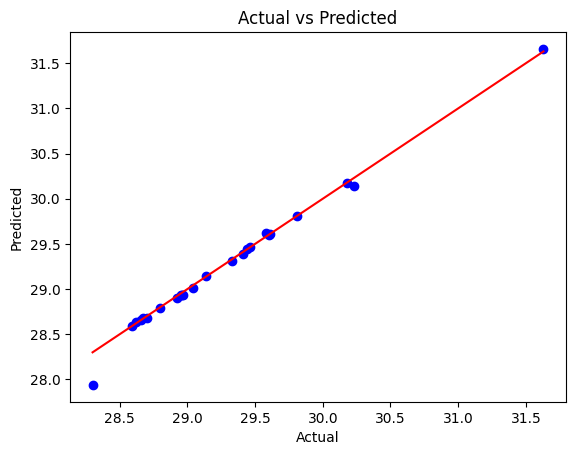

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_csv("temperatures.csv")
print(data.head())

# Step 2: Data Preprocessing
X = data.drop(columns=['YEAR', 'ANNUAL']).values  # Features
y = data['ANNUAL'].values  # Target

# Step 3: Apply Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression = LinearRegression()
regression.fit(X_train, y_train)

# Predict
y_pred = regression.predict(X_test)

# Step 4: Assess the Performance of Regression Models
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

# Step 5: Visualize the Simple Regression Model
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


6. Classification technique Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable. Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data
Set : https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary. Perform data-preparation (Train-Test Split)
-> Apply Machine Learning Algorithm

-> Evaluate Model

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Admission_Predict.csv")

# Convert 'Chance of Admit ' to binary 0 or 1
data['Admitted'] = data['Chance of Admit '].apply(lambda x: 1 if x >= 0.5 else 0)

# Drop 'Chance of Admit ' as we have created a binary target 'Admitted'
data = data.drop(columns=['Chance of Admit '])

# Features and target variable
X = data.drop(columns=['Admitted']).values
y = data['Admitted'].values

# Label Encoding for University Rating (since it's categorical)
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 92.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.94      0.97      0.96        70

    accuracy                           0.93        80
   macro avg       0.85      0.79      0.81        80
weighted avg       0.92      0.93      0.92        80


Confusion Matrix:
 [[ 6  4]
 [ 2 68]]



7. The dataset contains information of users from a company‘s database. It contains information about User ID, Gender, Age, Estimated Salary, and Purchased. Use this dataset for predicting that a user will purchase the company‘s newly launched product or not by Logistic Regression model.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("User_Data.csv")

# Features and target variable
X = data.drop(columns=['User ID', 'Purchased']).values
y = data['Purchased'].values

# Label Encoding for Gender (since it's categorical)
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
clf = LogisticRegression(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 65.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80


Confusion Matrix:
 [[52  0]
 [28  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. Implement KNN classifier to classify the binary classification problem of deciding whether a person has liver disease or not using the liver disease.csv data set given to you. You can use a sample file 2.pdf for your reference. you can also see how accuracy score is generated in this problem

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a sample dataframe from the given data
data_dict = {
    'PID': ['P2001', 'P2002', 'P2003', 'P2004', 'P2005', 'P2169', 'P2170', 'P2171', 'P2172', 'P2173'],
    'AGE': [48, 48, 18, 65, 48, 60, 40, 52, 31, 38],
    'GENDER': ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male'],
    'TB': [2.4, 5.0, 1.4, 4.9, 0.7, 0.5, 0.6, 0.8, 1.3, 1.0],
    'DB': [1.1, 2.6, 0.6, 2.7, 0.2, 0.1, 0.1, 0.2, 0.5, 0.3],
    'ALP': [554, 555, 215, 190, 208, 500, 98, 245, 184, 216],
    'ALT': [141, 284, 440, 33, 15, 20, 35, 48, 29, 21],
    'AST': [73, 190, 850, 71, 30, 34, 31, 49, 32, 24],
    'TP': [7.5, 6.5, 5.0, 7.1, 4.6, 5.9, 6.0, 6.4, 6.8, 7.3],
    'ALB': [3.6, 3.3, 1.9, 2.9, 2.1, 1.6, 3.2, 3.2, 3.4, 4.4],
    'AGR': [0.90, 1.00, 0.60, 0.70, 0.80, 0.37, 1.10, 1.00, 1.00, 1.50]
}

data = pd.DataFrame(data_dict)

# Label Encoding for 'GENDER' column
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

# Features and target variable
X = data.drop(columns=['PID']).values
y = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]  # Sample target values (0 for No liver disease, 1 for Liver disease)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 50.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
 [[0 1]
 [0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9. Implement Support Vector Machine for a dataset and compare the accuracy by applying the following kernel functions:
a. Linear
b. Polynomial
c. RBF

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to build and evaluate SVM model with different kernels
def svm_model(kernel_type):
    # Initialize SVM classifier with the specified kernel
    if kernel_type == 'linear':
        svm = SVC(kernel='linear', random_state=42)
    elif kernel_type == 'poly':
        svm = SVC(kernel='poly', degree=3, random_state=42)
    elif kernel_type == 'rbf':
        svm = SVC(kernel='rbf', random_state=42)
    else:
        print("Invalid kernel type.")
        return None

    # Fit the model
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Kernel types
kernel_types = ['linear', 'poly', 'rbf']

# Compare the accuracy for different kernel functions
for kernel in kernel_types:
    accuracy = svm_model(kernel)
    print(f"Accuracy for {kernel} kernel: {accuracy:.4f}")


Accuracy for linear kernel: 1.0000
Accuracy for poly kernel: 0.9778
Accuracy for rbf kernel: 1.0000


10. Build KNN Classification model for a given dataset. Vary the number of k values as follows and compare the results:

a. 1

b. 3

c. 5

d. 7

e. 11

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to build and evaluate KNN model
def knn_model(k):
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Varying the number of k values and comparing the results
k_values = [1, 3, 5, 7, 11]

for k in k_values:
    accuracy = knn_model(k)
    print(f"Accuracy for k = {k}: {accuracy:.4f}")


Accuracy for k = 1: 1.0000
Accuracy for k = 3: 1.0000
Accuracy for k = 5: 1.0000
Accuracy for k = 7: 1.0000
Accuracy for k = 11: 1.0000


11. Write a python program to implement K-Means clustering Algorithm. Vary the number of k values as follows and compare the results:

a. 1

b. 3

c. 5

d. 7

e. 11

<ipython-input-1-141def52a067>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-1-141def52a067>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

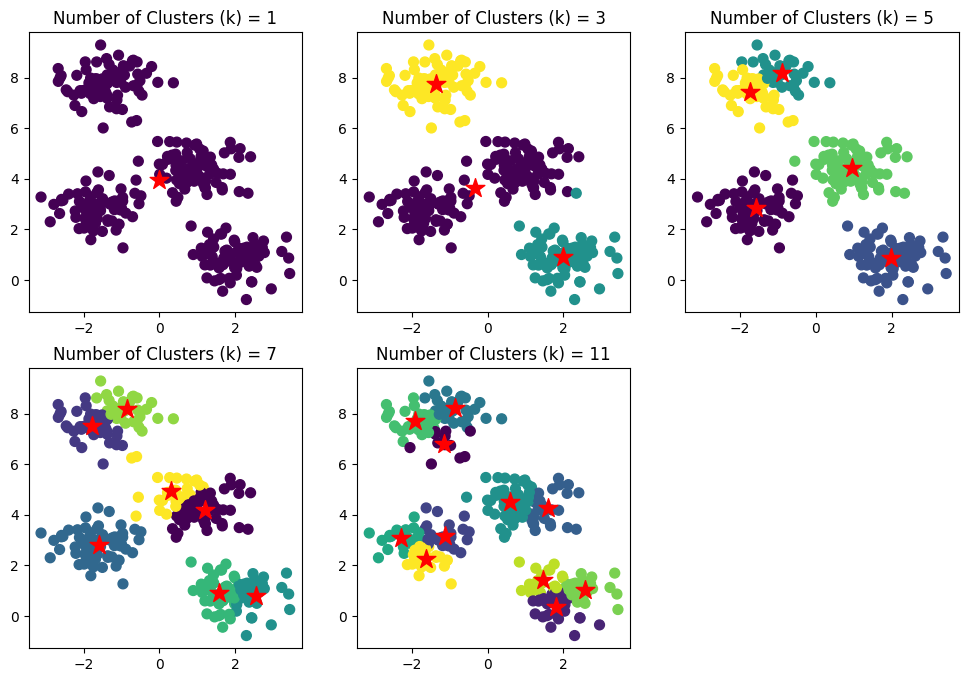

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define different values of k
k_values = [1, 3, 5, 7, 11]

# Plot the data points
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

# Implement K-Means clustering for each value of k
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Plot the cluster centers
    plt.subplot(2, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red')
    plt.title(f'Number of Clusters (k) = {k}')

plt.show()
